# Data Visualization

Fer grans visualitzacions de dades permet una bona manera de veure el poder de la codificació!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Matplotlib** és una biblioteca de visualització de dades multiplataforma basada en matrius NumPy.

Una de les característiques més importants de Matplotlib és la seva capacitat per jugar bé amb molts sistemes operatius i backends gràfics. Matplotlib admet desenes de backends i tipus de sortida, el que significa que podeu comptar amb que funcioni independentment del sistema operatiu que utilitzeu o del format de sortida que vulgueu.

## 1. Gràfics de línies simples

Potser el més senzill de tots els gràfics és la visualització d'una única funció y=f(x). 

A Matplotlib, la figura (una instància de la classe plt.Figure) es pot considerar com un únic contenidor que conté tots els objectes que representen eixos, gràfics, text i etiquetes. Els eixos (una instància de la classe plt.Axes) és un quadre delimitador amb ticks i etiquetes, que eventualment contindrà els elements de trama que formen la nostra visualització. 

Comencem amb una sinusoide simple:

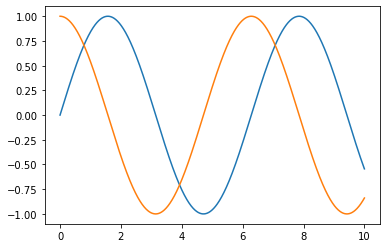

In [2]:
x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

El primer ajust que podeu fer a una trama és controlar els colors i els estils de línia. La funció **plt.plot()** pren arguments addicionals que es poden utilitzar per especificar-los. Per ajustar el color, podeu utilitzar la paraula clau **color**, que accepta un argument de cadena que representa pràcticament qualsevol color imaginable. El color es pot especificar de diverses maneres: 'blue', 'g', '0.75', '#FFDD44', (1.0,0.2,0.3) i 'chartreuse' (especifiqueu el color pel nom, codi de color curt (rgbcmyk), escala de grisos entre 0 i 1, codi hexadecimal (RRGGBB de 00 a FF), tupla RGB, valors de 0 a 1, tots els noms de color HTML admesos).

De la mateixa manera, l'estil de línia es pot ajustar mitjançant la paraula clau **linestyle**: 'solid', 'dashed', 'dashdot' i 'dotted'.

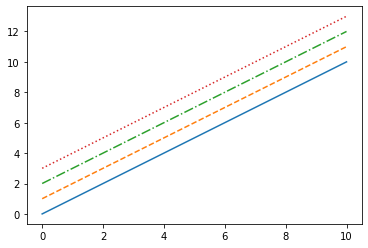

In [3]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

**Ajust de la trama: límits dels eixos**

Matplotlib fa un treball decent per triar els límits d'eixos predeterminats per a la vostra trama, però de vegades és bo tenir un control més fi. La manera més bàsica d'ajustar els límits dels eixos és utilitzar els mètodes plt.xlim() i plt.ylim().

(-1.5, 1.5)

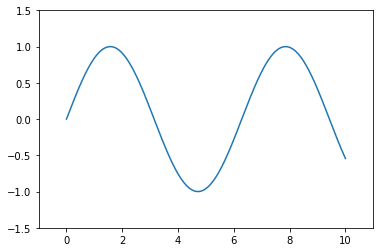

In [4]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

**Etiquetatge de parcel·les**

Etiquetatge de les trames: títols, etiquetes d'eixos i llegendes senzilles.

Els títols i les etiquetes d'eix són les etiquetes més senzilles; hi ha mètodes que es poden utilitzar per configurar-los ràpidament:

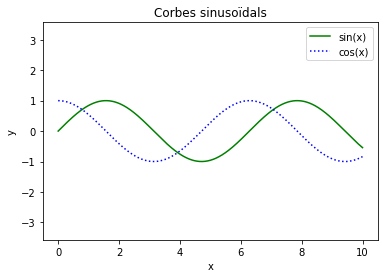

In [5]:
plt.title("Corbes sinusoïdals")
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend()

**Dues interfícies pel preu d'una**

Tot i que la majoria de funcions plt es tradueixen directament a mètodes ax (com ara plt.plot() → ax.plot(), plt.legend() → ax.legend(), etc.), aquest no és el cas de totes les ordres. En particular, es modifiquen lleugerament les funcions per establir límits, etiquetes i títols. Per fer la transició entre funcions, feu els canvis següents:

- plt.xlabel() → ax.set_xlabel()
- plt.ylabel() → ax.set_ylabel()
- plt.xlim() → ax.set_xlim()
- plt.ylim() → ax.set_ylim()
- plt.title() → ax.set_title()

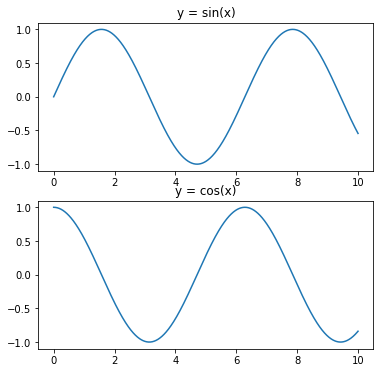

In [6]:
# create the first of two panels and set current axis
fig, axs = plt.subplots(2, 1, figsize = (6, 6)) # (rows, columns, panel number)
axs[0].plot(x, np.sin(x))
axs[0].set_title('y = sin(x)')

# create the second panel and set current axis
axs[1].plot(x, np.cos(x))
axs[1].set_title('y = cos(x)')

plt.show()

## 2. Gràfics de dispersió simples (scatter)

Un altre tipus de trama que s'utilitza habitualment és el diagrama de dispersió simple, un cosí proper del diagrama de línies. En lloc d'unir els punts per segments de línia, aquí els punts es representen individualment amb un punt, cercle o una altra forma.

La diferència principal de **plt.scatter** de **plt.plot** és que es pot utilitzar per crear gràfics de dispersió on les propietats de cada punt individual (mida, color de cara, color de vora, etc.) es poden controlar o mapejar individualment a les dades.

Mostrem això creant un diagrama de dispersió aleatori amb punts de molts colors i mides. Per veure millor els resultats superposats, també utilitzarem la paraula clau *alfa* per ajustar el nivell de transparència:

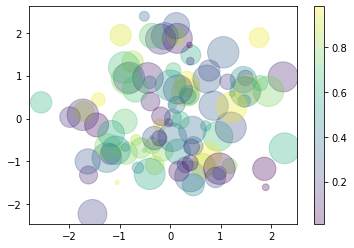

In [7]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar()  # show color scale

## 3. Histogrames, binnings i densitat

Un simple histograma pot ser un gran primer pas per entendre un conjunt de dades.

(array([ 2.,  0.,  0.,  0.,  2.,  0.,  4., 13., 14., 22., 22., 45., 49.,
        71., 72., 67., 89., 90., 95., 64., 70., 57., 45., 30., 29., 15.,
        18.,  9.,  4.,  2.]),
 array([-3.73417195, -3.51832736, -3.30248278, -3.08663819, -2.87079361,
        -2.65494902, -2.43910444, -2.22325985, -2.00741527, -1.79157068,
        -1.5757261 , -1.35988151, -1.14403693, -0.92819234, -0.71234776,
        -0.49650317, -0.28065859, -0.064814  ,  0.15103058,  0.36687517,
         0.58271975,  0.79856434,  1.01440892,  1.23025351,  1.44609809,
         1.66194268,  1.87778727,  2.09363185,  2.30947644,  2.52532102,
         2.74116561]),
 [<matplotlib.patches.Polygon at 0x2bb32914550>])

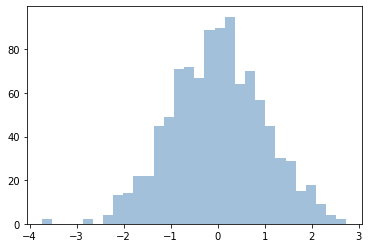

In [8]:
data = np.random.randn(1000)
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')

(array([ 1.,  1.,  1.,  1.,  0.,  1.,  3.,  6., 10.,  9., 15., 19., 31.,
        30., 46., 51., 43., 45., 69., 65., 63., 57., 56., 63., 63., 59.,
        39., 37., 30., 17., 20., 14.,  9.,  5.,  8.,  3.,  4.,  3.,  1.,
         2.]),
 array([-3.94427079, -3.60875058, -3.27323037, -2.93771016, -2.60218995,
        -2.26666973, -1.93114952, -1.59562931, -1.2601091 , -0.92458889,
        -0.58906868, -0.25354847,  0.08197174,  0.41749195,  0.75301217,
         1.08853238,  1.42405259,  1.7595728 ,  2.09509301,  2.43061322,
         2.76613343,  3.10165364,  3.43717386,  3.77269407,  4.10821428,
         4.44373449,  4.7792547 ,  5.11477491,  5.45029512,  5.78581533,
         6.12133554,  6.45685576,  6.79237597,  7.12789618,  7.46341639,
         7.7989366 ,  8.13445681,  8.46997702,  8.80549723,  9.14101744,
         9.47653766]),
 [<matplotlib.patches.Polygon at 0x2bb32953eb0>])

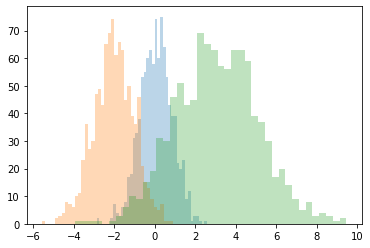

In [9]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

## 4. Visualització d'imatges

En alguns casos és interessant visualitzar una imatge. Recordeu que una imatge no és més que una matriu amb tres canals: R, G, B.

Una matriu unidimensional també es pot visualitzar com un mapa de calor.

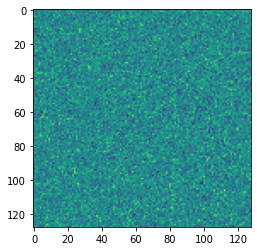

In [10]:
matriu = np.random.randn(128 * 128).reshape((128, 128))
plt.imshow(matriu)